In [12]:
import os
import re
from os import listdir
from os.path import isfile, join

root_directory="/home/beams/MJAMIL/hpdt4ha/log_files/"
###############################################
target_log_directory="/bmon/"
###############################################
log_directory=root_directory+target_log_directory
print(log_directory)
log_file_list=[os.path.join(log_directory, f) for f in os.listdir(log_directory) if os.path.isfile(os.path.join(log_directory, f))]
print(log_file_list)

/home/beams/MJAMIL/hpdt4ha/log_files//bmon/
['/home/beams/MJAMIL/hpdt4ha/log_files//bmon/go_1_stream_5_18_23.txt', '/home/beams/MJAMIL/hpdt4ha/log_files//bmon/c_1_stream_5_18_23.txt']


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


go_computation_transfer_5_18_23.txt
249 249 249 249 249
                                Time  enp202s0f0_bytes  enp202s0f0_numbers   
count                             61         61.000000                61.0  \
mean   2023-05-18 15:02:29.999999744          0.000068                 0.0   
min              2023-05-18 15:02:00          0.000051                 0.0   
25%              2023-05-18 15:02:15          0.000062                 0.0   
50%              2023-05-18 15:02:30          0.000067                 0.0   
75%              2023-05-18 15:02:45          0.000073                 0.0   
max              2023-05-18 15:03:00          0.000089                 0.0   
std                              NaN          0.000008                 0.0   

       enp202s0f1_bytes  enp202s0f1_numbers  ens2f0_bytes  ens2f0_numbers   
count         61.000000                61.0  6.100000e+01            61.0  \
mean           0.082650                 0.0  1.551921e-07             0.0   
min       

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


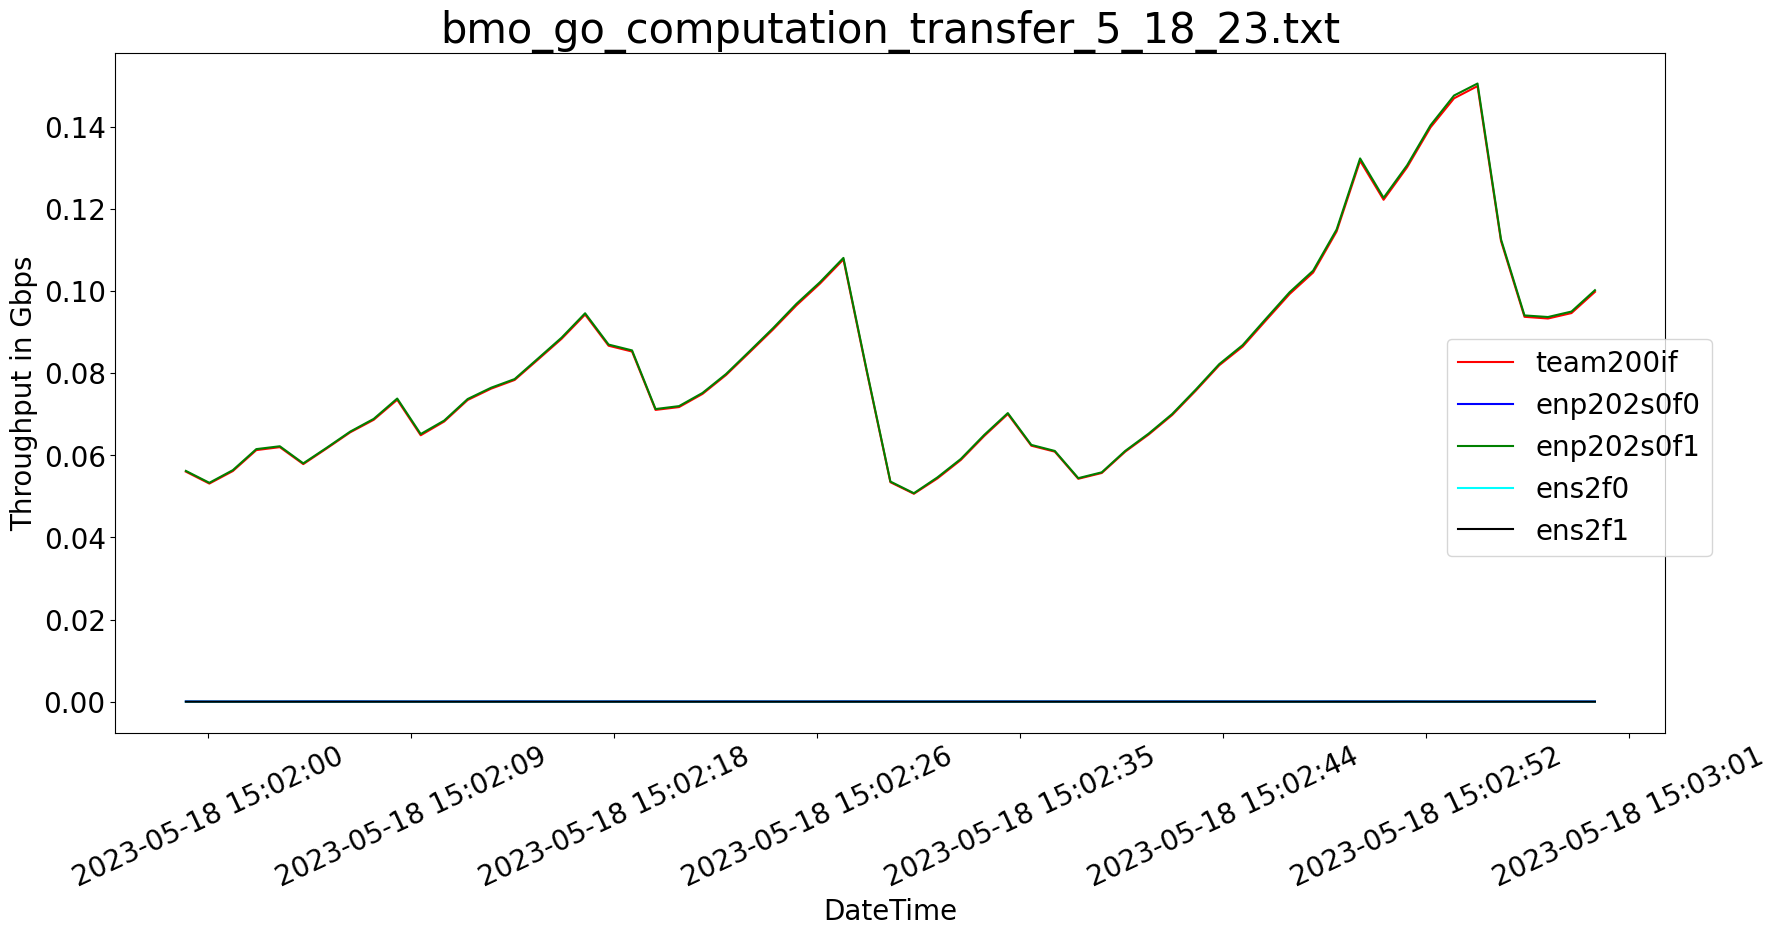

In [25]:
######################################
##TO ANALYZE AVERAGE THROUGHPUT FOR DIFFERENT INTERFACES
######################################

####
##log file format: '$(element:name) $(attr:rxrate:bytes) $(attr:txrate:bytes) $(attr:rxrate:packets) $(attr:txrate:packets) \n'
####

import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
from pathlib import Path 
import re

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times"
target_log_directory="/bmon/"

column_names=['Time','enp202s0f0_bytes','enp202s0f0_numbers','enp202s0f1_bytes','enp202s0f1_numbers','ens2f0_bytes','ens2f0_numbers','ens2f1_bytes','ens2f1_numbers','team400if_bytes','team400if_numbers']
interfaces=["enp202s0f0","enp202s0f1","ens2f0","ens2f1","team200"]

LOG_FILE_PATH='/home/beams/MJAMIL/hpdt4ha/log_files/bmon/go_computation_transfer_5_18_23.txt'
filename=Path(LOG_FILE_PATH).name
regex='_interface_00.log'
label_name=re.split(regex, filename,maxsplit=1)[0]
print(label_name)
###############
timestamps=[]
################
receive_bytes_enp202s0f0=[]
receive_packets_number_enp202s0f0=[]
receive_bytes_enp202s0f1=[]
receive_packets_number_enp202s0f1=[]
################
receive_bytes_ens2f0=[]
receive_packets_number_ens2f0=[]
receive_bytes_ens2f1=[]
receive_packets_number_ens2f1=[]
#################
receive_bytes_team400if=[]
receive_packets_number_team400if=[]
##################
old_timestamp=0
with open(LOG_FILE_PATH, "r") as log_file:
        for row in log_file:
            components = row.strip().split()
            if int(components[0])!=old_timestamp:
                timestamp = datetime.datetime.fromtimestamp(int(components[0]))
                timestamps.append(timestamp)
                old_timestamp=int(components[0])
                if str(components[1])==interfaces[0]:
                    receive_bytes_enp202s0f0.append((float(components[2])*8)/1000000000)
                    receive_packets_number_enp202s0f0.append(float(components[4]))
                elif str(components[1])==interfaces[1]:
                    receive_bytes_enp202s0f1.append((float(components[2])*8)/1000000000)
                    receive_packets_number_enp202s0f1.append(float(components[4]))
                elif str(components[1])==interfaces[2]:
                    receive_bytes_ens2f0.append((float(components[2])*8)/1000000000)
                    receive_packets_number_ens2f0.append(float(components[4]))
                elif str(components[1])==interfaces[3]:
                    receive_bytes_ens2f1.append((float(components[2])*8)/1000000000)
                    receive_packets_number_ens2f1.append(float(components[4]))
                elif str(components[1])==interfaces[4]:
                    receive_bytes_team400if.append((float(components[2])*8)/1000000000)
                    receive_packets_number_team400if.append(float(components[4]))
            else:
                if str(components[1])==interfaces[0]:
                    receive_bytes_enp202s0f0.append((float(components[2])*8)/1000000000)
                    receive_packets_number_enp202s0f0.append(float(components[4]))
                elif str(components[1])==interfaces[1]:
                    receive_bytes_enp202s0f1.append((float(components[2])*8)/1000000000)
                    receive_packets_number_enp202s0f1.append(float(components[4]))
                elif str(components[1])==interfaces[2]:
                    receive_bytes_ens2f0.append((float(components[2])*8)/1000000000)
                    receive_packets_number_ens2f0.append(float(components[4]))
                elif str(components[1])==interfaces[3]:
                    receive_bytes_ens2f1.append((float(components[2])*8)/1000000000)
                    receive_packets_number_ens2f1.append(float(components[4]))
                elif str(components[1])==interfaces[4]:
                    receive_bytes_team400if.append((float(components[2])*8)/1000000000)
                    receive_packets_number_team400if.append(float(components[4]))

print(len(timestamps),len(receive_bytes_enp202s0f0),len(receive_packets_number_enp202s0f0),len(receive_bytes_team400if),len(receive_packets_number_team400if))


data = list(zip(
    timestamps,
    receive_bytes_enp202s0f0,
    receive_packets_number_enp202s0f0,
    receive_bytes_enp202s0f1,
    receive_packets_number_enp202s0f1,
    receive_bytes_ens2f0,
    receive_packets_number_ens2f0,
    receive_bytes_ens2f1,
    receive_packets_number_ens2f1,
    receive_bytes_team400if,
    receive_packets_number_team400if
))

df = pd.DataFrame(data,index =timestamps,columns=column_names)
##################
##Filtering the interesting section for throughput measurement
###################
df=df.loc['2023-05-18 15:02:00':'2023-05-18 15:03:00']

print(df.describe())

fig, ax1 = plt.subplots(figsize=(20, 10),sharex=False)


df['Time'] = pd.to_datetime(df['Time'])
#column_names=['Time','enp202s0f0_bytes','enp202s0f0_numbers','enp202s0f1_bytes','enp202s0f1_numbers','ens2f0_bytes','ens2f0_numbers','ens2f1_bytes','ens2f1_numbers','team400if_bytes','team400if_numbers']

dates=df['Time'].tolist()
datenums=md.date2num(dates)
plt.subplots_adjust(bottom=0.2)
plt.xticks( fontsize=20,rotation=25 )
plt.yticks(fontsize=20)
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)

plt.plot(datenums,df['team400if_bytes'],color='red',label="team200if")
plt.plot(datenums,df['enp202s0f0_bytes'],color='blue',label="enp202s0f0")
plt.plot(datenums,df['enp202s0f1_bytes'],color='green',label="enp202s0f1")
plt.plot(datenums,df['ens2f0_bytes'],color='cyan',label="ens2f0")
plt.plot(datenums,df['ens2f1_bytes'],color='black',label="ens2f1")


plt.xlabel("DateTime",fontsize=20)
plt.ylabel("Throughput in Gbps",fontsize=20)
plt.legend(fontsize=20,bbox_to_anchor=[0.85,0.6],ncol=1)
label_name=target_log_directory[1:-2]+'_'+label_name
plt.title(label_name,fontsize=30)
# plt.savefig(label_name+'.png', format='png',bbox_inches='tight',dpi=100)
plt.show()


In [26]:
df.loc[df['team400if_bytes'].idxmax()]

Time                  2023-05-18 15:02:55
enp202s0f0_bytes                 0.000066
enp202s0f0_numbers                    0.0
enp202s0f1_bytes                 0.150483
enp202s0f1_numbers                    0.0
ens2f0_bytes                          0.0
ens2f0_numbers                        0.0
ens2f1_bytes                          0.0
ens2f1_numbers                        0.0
team400if_bytes                   0.14986
team400if_numbers                     0.0
Name: 2023-05-18 15:02:55, dtype: object

In [27]:
df.loc[:, 'team400if_bytes'].mean()

0.08235183173770491

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


c_lz4_compute_transfer_5_18_23.txt
119 119 119 119 119
                                Time  enp202s0f0_bytes  enp202s0f0_numbers   
count                             44         44.000000           44.000000  \
mean      2023-05-18 15:50:10.500000          0.000189           44.417955   
min              2023-05-18 15:49:49          0.000096           30.020000   
25%    2023-05-18 15:49:59.750000128          0.000155           40.027500   
50%       2023-05-18 15:50:10.500000          0.000182           43.220000   
75%    2023-05-18 15:50:21.249999872          0.000219           49.395000   
max              2023-05-18 15:50:32          0.000321           59.400000   
std                              NaN          0.000055            7.068205   

       enp202s0f1_bytes  enp202s0f1_numbers  ens2f0_bytes  ens2f0_numbers   
count         44.000000           44.000000  4.400000e+01       44.000000  \
mean           0.568236        16991.140000  1.109109e-07        0.136364   
min        

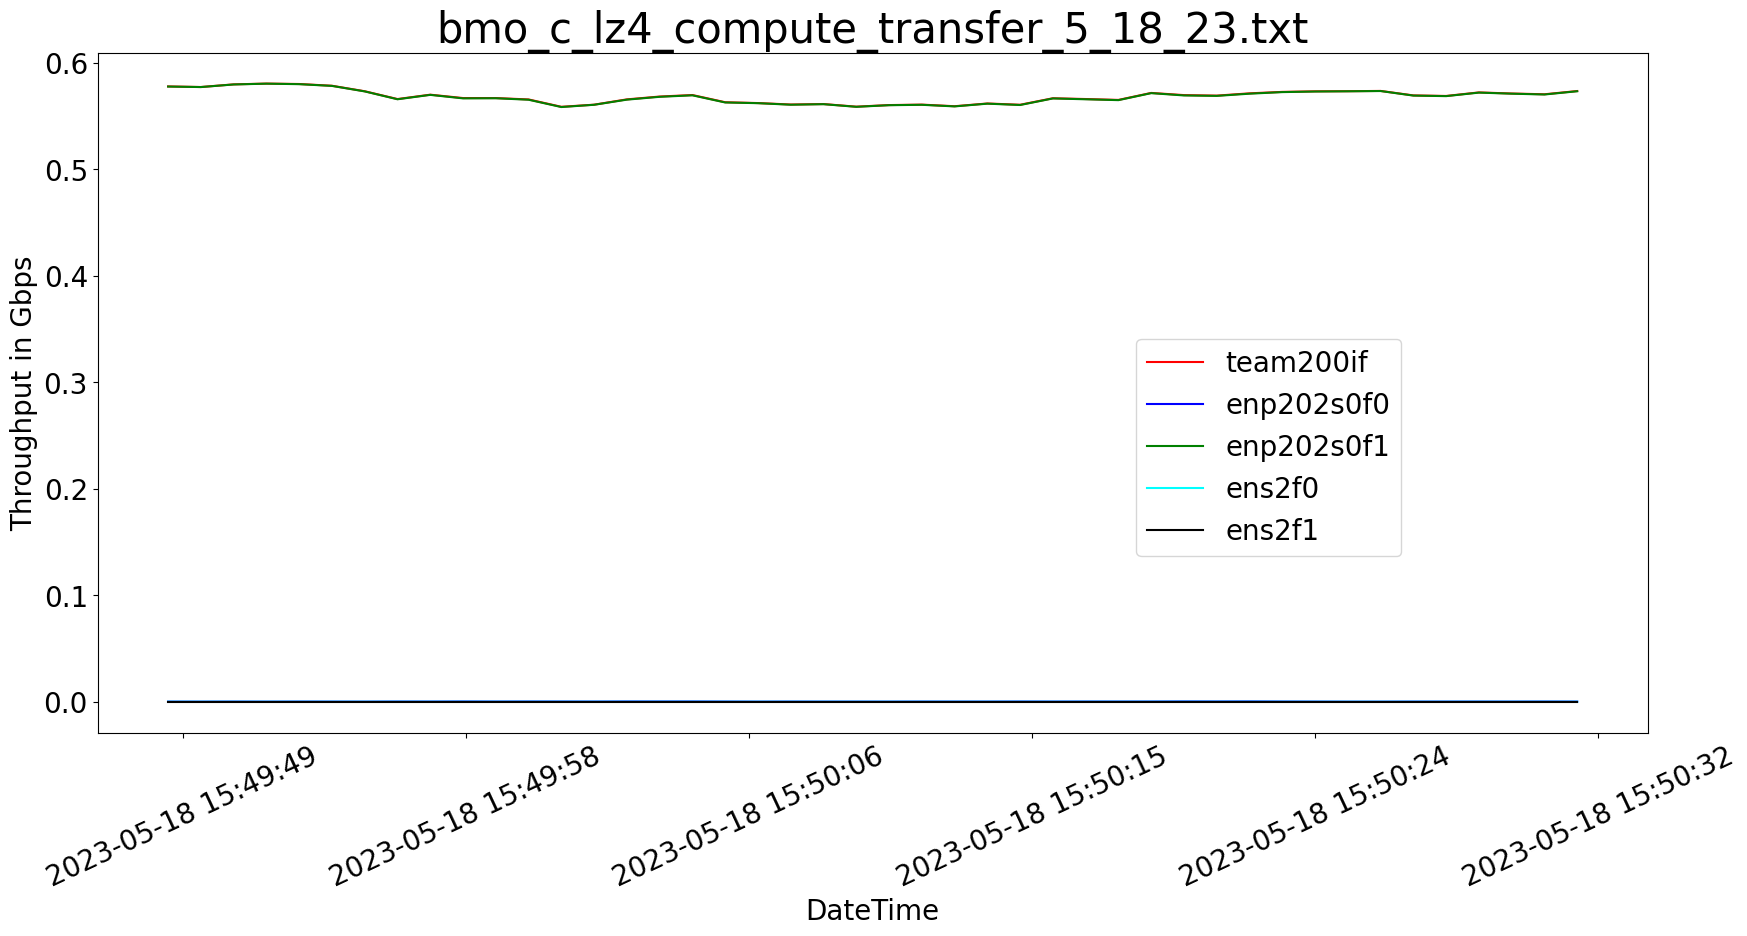

In [33]:
######################################
##TO ANALYZE AVERAGE THROUGHPUT FOR DIFFERENT INTERFACES
######################################

####
##log file format: '$(element:name) $(attr:rxrate:bytes) $(attr:txrate:bytes) $(attr:rxrate:packets) $(attr:txrate:packets) \n'
####

import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
from pathlib import Path 
import re

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times"
target_log_directory="/bmon/"

column_names=['Time','enp202s0f0_bytes','enp202s0f0_numbers','enp202s0f1_bytes','enp202s0f1_numbers','ens2f0_bytes','ens2f0_numbers','ens2f1_bytes','ens2f1_numbers','team400if_bytes','team400if_numbers']
interfaces=["enp202s0f0","enp202s0f1","ens2f0","ens2f1","team200"]

LOG_FILE_PATH='/home/beams/MJAMIL/hpdt4ha/log_files/bmon/c_lz4_compute_transfer_5_18_23.txt'
filename=Path(LOG_FILE_PATH).name
regex='_interface_00.log'
label_name=re.split(regex, filename,maxsplit=1)[0]
print(label_name)
###############
timestamps=[]
################
receive_bytes_enp202s0f0=[]
receive_packets_number_enp202s0f0=[]
receive_bytes_enp202s0f1=[]
receive_packets_number_enp202s0f1=[]
################
receive_bytes_ens2f0=[]
receive_packets_number_ens2f0=[]
receive_bytes_ens2f1=[]
receive_packets_number_ens2f1=[]
#################
receive_bytes_team400if=[]
receive_packets_number_team400if=[]
##################
old_timestamp=0
with open(LOG_FILE_PATH, "r") as log_file:
        for row in log_file:
            components = row.strip().split()
            if int(components[0])!=old_timestamp:
                timestamp = datetime.datetime.fromtimestamp(int(components[0]))
                timestamps.append(timestamp)
                old_timestamp=int(components[0])
                if str(components[1])==interfaces[0]:
                    receive_bytes_enp202s0f0.append((float(components[3])*8)/1000000000)
                    receive_packets_number_enp202s0f0.append(float(components[5]))
                elif str(components[1])==interfaces[1]:
                    receive_bytes_enp202s0f1.append((float(components[3])*8)/1000000000)
                    receive_packets_number_enp202s0f1.append(float(components[5]))
                elif str(components[1])==interfaces[2]:
                    receive_bytes_ens2f0.append((float(components[3])*8)/1000000000)
                    receive_packets_number_ens2f0.append(float(components[5]))
                elif str(components[1])==interfaces[3]:
                    receive_bytes_ens2f1.append((float(components[3])*8)/1000000000)
                    receive_packets_number_ens2f1.append(float(components[5]))
                elif str(components[1])==interfaces[4]:
                    receive_bytes_team400if.append((float(components[3])*8)/1000000000)
                    receive_packets_number_team400if.append(float(components[5]))
            else:
                if str(components[1])==interfaces[0]:
                    receive_bytes_enp202s0f0.append((float(components[3])*8)/1000000000)
                    receive_packets_number_enp202s0f0.append(float(components[5]))
                elif str(components[1])==interfaces[1]:
                    receive_bytes_enp202s0f1.append((float(components[3])*8)/1000000000)
                    receive_packets_number_enp202s0f1.append(float(components[5]))
                elif str(components[1])==interfaces[2]:
                    receive_bytes_ens2f0.append((float(components[3])*8)/1000000000)
                    receive_packets_number_ens2f0.append(float(components[5]))
                elif str(components[1])==interfaces[3]:
                    receive_bytes_ens2f1.append((float(components[3])*8)/1000000000)
                    receive_packets_number_ens2f1.append(float(components[5]))
                elif str(components[1])==interfaces[4]:
                    receive_bytes_team400if.append((float(components[3])*8)/1000000000)
                    receive_packets_number_team400if.append(float(components[5]))

print(len(timestamps),len(receive_bytes_enp202s0f0),len(receive_packets_number_enp202s0f0),len(receive_bytes_team400if),len(receive_packets_number_team400if))


data = list(zip(
    timestamps,
    receive_bytes_enp202s0f0,
    receive_packets_number_enp202s0f0,
    receive_bytes_enp202s0f1,
    receive_packets_number_enp202s0f1,
    receive_bytes_ens2f0,
    receive_packets_number_ens2f0,
    receive_bytes_ens2f1,
    receive_packets_number_ens2f1,
    receive_bytes_team400if,
    receive_packets_number_team400if
))

df = pd.DataFrame(data,index =timestamps,columns=column_names)
##################
##Filtering the interesting section for throughput measurement
###################
df=df.loc['2023-05-18 15:49:49':'2023-05-18 15:50:32']

print(df.describe())

fig, ax1 = plt.subplots(figsize=(20, 10),sharex=False)


df['Time'] = pd.to_datetime(df['Time'])
#column_names=['Time','enp202s0f0_bytes','enp202s0f0_numbers','enp202s0f1_bytes','enp202s0f1_numbers','ens2f0_bytes','ens2f0_numbers','ens2f1_bytes','ens2f1_numbers','team400if_bytes','team400if_numbers']

dates=df['Time'].tolist()
datenums=md.date2num(dates)
plt.subplots_adjust(bottom=0.2)
plt.xticks( fontsize=20,rotation=25 )
plt.yticks(fontsize=20)
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)

plt.plot(datenums,df['team400if_bytes'],color='red',label="team200if")
plt.plot(datenums,df['enp202s0f0_bytes'],color='blue',label="enp202s0f0")
plt.plot(datenums,df['enp202s0f1_bytes'],color='green',label="enp202s0f1")
plt.plot(datenums,df['ens2f0_bytes'],color='cyan',label="ens2f0")
plt.plot(datenums,df['ens2f1_bytes'],color='black',label="ens2f1")


plt.xlabel("DateTime",fontsize=20)
plt.ylabel("Throughput in Gbps",fontsize=20)
plt.legend(fontsize=20,bbox_to_anchor=[0.85,0.6],ncol=1)
label_name=target_log_directory[1:-2]+'_'+label_name
plt.title(label_name,fontsize=30)
# plt.savefig(label_name+'.png', format='png',bbox_inches='tight',dpi=100)
plt.show()


In [34]:
df.loc[df['team400if_bytes'].idxmax()]

Time                  2023-05-18 15:49:52
enp202s0f0_bytes                 0.000116
enp202s0f0_numbers                  37.17
enp202s0f1_bytes                 0.580366
enp202s0f1_numbers               17350.52
ens2f0_bytes                          0.0
ens2f0_numbers                       0.19
ens2f1_bytes                          0.0
ens2f1_numbers                        0.0
team400if_bytes                  0.580437
team400if_numbers                17340.91
Name: 2023-05-18 15:49:52, dtype: object

In [35]:
df.loc[:, 'team400if_bytes'].mean()

0.5684141294545454